# 例 10.2 画无向图

图所示的无向图, 其邻接矩阵为
$$
\boldsymbol{A}=\left[\begin{array}{lllll}
0 & 9 & 2 & 4 & 7 \\
9 & 0 & 3 & 4 & 0 \\
2 & 3 & 0 & 8 & 4 \\
4 & 4 & 8 & 0 & 6 \\
7 & 0 & 4 & 6 & 0
\end{array}\right].
$$

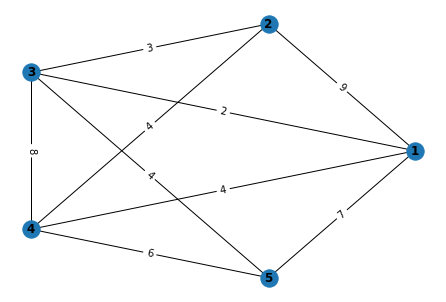

In [5]:
import networkx as nx
import pylab as plt
import numpy as np

List = [(1, 2, 9), (1, 3, 2), (1, 4, 4), (1, 5, 7), (2, 3, 3), (2, 4, 4),
        (3, 4, 8), (3, 5, 4), (4, 5, 6)]

G = nx.Graph()  # 创建无向图
G.add_nodes_from(range(1, 6))  # 添加顶点集合
G.add_weighted_edges_from(List)  # 通过列表增加权重
pos = nx.shell_layout(G)  # 图形样式, 顶点在同心圆上分布
w = nx.get_edge_attributes(G, "weight")  # 获取 graph 中的边权重
nx.draw(G, pos, with_labels=True, font_weight="bold", font_size=12)
nx.draw_networkx_edge_labels(G, pos, edge_labels=w)  # 把边权重画出来
plt.show()

# 例 10.3 画有向图

图所示的有向图的邻接矩阵为
$$
\boldsymbol{A}=\left[\begin{array}{llllll}
0 & 1 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 & 0 & 1 \\
0 & 1 & 0 & 1 & 0 & 1 \\
0 & 0 & 0 & 0 & 1 & 0
\end{array}\right].
$$

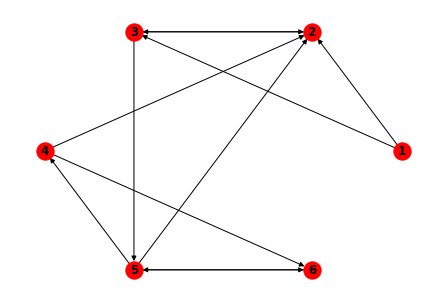

In [9]:
import numpy as np
import networkx as nx
import pylab as plt

G = nx.DiGraph()  # 创建有向图
List = [(1, 2), (1, 3), (2, 3), (3, 2), (3, 5), (4, 2), (4, 6), (5, 2), (5, 4),
        (5, 6), (6, 5)]
G.add_nodes_from(range(1, 7))
G.add_edges_from(List)
plt.rc("font", size=16)
pos = nx.shell_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='r')
plt.savefig("figure10_3.png", dpi=500)
plt.show()

# 例 10.6 Dijkstra（迪杰斯特拉）算法

求图所示的图 $G$ 中从 $v_{3}$ 到所有其余顶点的最短路及最短距离.

In [10]:
import numpy as np
import networkx as nx

List = [(0, 1, 1), (0, 2, 2), (0, 4, 7), (0, 6, 4), (0, 7, 8), (1, 2, 2),
        (1, 3, 3), (1, 7, 7), (2, 3, 1), (2, 4, 5), (3, 4, 3), (3, 5, 6),
        (4, 5, 4), (4, 6, 3), (5, 6, 6), (5, 7, 4), (6, 7, 2)]

G = nx.Graph()
G.add_weighted_edges_from(List)
A = nx.to_numpy_matrix(G, nodelist=range(8))  # 导出邻接矩阵
np.savetxt("Pdata10_6.txt", A)
p = nx.dijkstra_path(G, source=3, target=7, weight='weight')  # 求最短路径

d = nx.dijkstra_path_length(G, 3, 7, weight="weight")  # 求最短距离
print("最短路径为：", p, "\n最短距离为：", d)

最短路径为： [3, 4, 6, 7] 
最短距离为： 8


# 例 10.8  Floyd算法 

(续例10.5) 求图所示的图 $G$ 中所有顶点对之间的最短距离和最短路径. 直接调用 networkx 库函数, 编写的程序如下:

In [12]:
import numpy as np
import networkx as nx
a = np.loadtxt("Pdata10_6.txt")
G = nx.Graph(a)  # 利用邻接矩阵构造赋权无向图
d = nx.shortest_path_length(G, weight='weight')  # 返回值是可迭代类型
Ld = dict(d)  # 转换为字典类型
print("顶点对之间的距离为：", Ld)  # 显示所有顶点对之间的最短距离
print("顶点0到顶点4的最短距离为:", Ld[0][4])  # 显示一对顶点之间的最短距离
m, n = a.shape
dd = np.zeros((m, n))
for i in range(m):
    for j in range(n):
        dd[i, j] = Ld[i][j]
print("顶点对之间最短距离的数组表示为：\n", dd)  # 显示所有顶点对之间最短距离
np.savetxt('Pdata10_8.txt', dd)  # 把最短距离数组保存到文本文件中
p = nx.shortest_path(G, weight='weight')  # 返回值是可迭代类型
dp = dict(p)  # 转换为字典类型
print("\n顶点对之间的最短路径为：", dp)
print("顶点 0 到顶点 4 的最短路径为：", dp[0][4])

顶点对之间的距离为： {0: {0: 0, 1: 1.0, 2: 2.0, 3: 3.0, 6: 4.0, 4: 6.0, 7: 6.0, 5: 9.0}, 1: {1: 0, 0: 1.0, 2: 2.0, 3: 3.0, 6: 5.0, 4: 6.0, 7: 7.0, 5: 9.0}, 2: {2: 0, 3: 1.0, 0: 2.0, 1: 2.0, 4: 4.0, 6: 6.0, 5: 7.0, 7: 8.0}, 3: {3: 0, 2: 1.0, 1: 3.0, 4: 3.0, 0: 3.0, 5: 6.0, 6: 6.0, 7: 8.0}, 4: {4: 0, 3: 3.0, 6: 3.0, 5: 4.0, 2: 4.0, 7: 5.0, 1: 6.0, 0: 6.0}, 5: {5: 0, 4: 4.0, 7: 4.0, 3: 6.0, 6: 6.0, 2: 7.0, 1: 9.0, 0: 9.0}, 6: {6: 0, 7: 2.0, 4: 3.0, 0: 4.0, 1: 5.0, 5: 6.0, 3: 6.0, 2: 6.0}, 7: {7: 0, 6: 2.0, 5: 4.0, 4: 5.0, 0: 6.0, 1: 7.0, 3: 8.0, 2: 8.0}}
顶点0到顶点4的最短距离为: 6.0
顶点对之间最短距离的数组表示为：
 [[0. 1. 2. 3. 6. 9. 4. 6.]
 [1. 0. 2. 3. 6. 9. 5. 7.]
 [2. 2. 0. 1. 4. 7. 6. 8.]
 [3. 3. 1. 0. 3. 6. 6. 8.]
 [6. 6. 4. 3. 0. 4. 3. 5.]
 [9. 9. 7. 6. 4. 0. 6. 4.]
 [4. 5. 6. 6. 3. 6. 0. 2.]
 [6. 7. 8. 8. 5. 4. 2. 0.]]

顶点对之间的最短路径为： {0: {0: [0], 1: [0, 1], 2: [0, 2], 4: [0, 2, 3, 4], 6: [0, 6], 7: [0, 6, 7], 3: [0, 2, 3], 5: [0, 2, 3, 5]}, 1: {1: [1], 0: [1, 0], 2: [1, 2], 3: [1, 3], 7: [1, 7], 4: [1, 3, 4], 6: [1

# 例 10.13 最小生成树

(续例10.11) 利用 networkx 的 Kruskal算法求例10.11 的最小生成树.

最小生成树为: {(1, 5): 2, (2, 3): 4, (3, 5): 1, (3, 4): 2}
最小生成树的长度为： 9


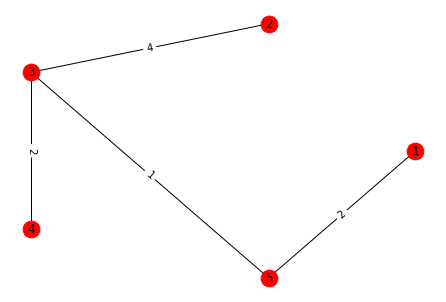

In [13]:
import numpy as np
import networkx as nx
import pylab as plt

L = [(1, 2, 8), (1, 3, 4), (1, 5, 2), (2, 3, 4), (3, 4, 2), (3, 5, 1),
     (4, 5, 5)]
b = nx.Graph()
b.add_nodes_from(range(1, 6))
b.add_weighted_edges_from(L)
T = nx.minimum_spanning_tree(b)  # 返回可迭代对象
w = nx.get_edge_attributes(T, 'weight')  # 提取字典数据
TL = sum(w.values())  # 计算最小生成树的长度
print("最小生成树为:", w)
print("最小生成树的长度为：", TL)
pos = nx.shell_layout(b)
nx.draw(T, pos, node_size=280, with_labels=True, node_color='r')
nx.draw_networkx_edge_labels(T, pos, edge_labels=w)
plt.show()

# 例 10.15 最优分配问题

假设要分配 $ 5 $ 个人做 $ 5 $ 项不同工作, 每个人做不同工作产生的效益由邻接矩阵
$$
\boldsymbol{W}=\left(w_{i j}\right)_{5 \times 5}=\left[\begin{array}{lllll}
3 & 5 & 5 & 4 & 1 \\
2 & 2 & 0 & 2 & 2 \\
2 & 4 & 4 & 1 & 0 \\
0 & 2 & 2 & 1 & 0 \\
1 & 2 & 1 & 3 & 3
\end{array}\right]
$$
表示, 即 $w_{i j}~(i, j=1,2, \cdots, 5)$ 表示第 $i$ 个人干第 $j$ 项工作的效益, 试求使效益达到最大的分配方案.

In [21]:
import numpy as np
import networkx as nx
from networkx.algorithms.matching import max_weight_matching

a = np.array([[3, 5, 5, 4, 1], [2, 2, 0, 2, 2], [2, 4, 4, 1, 0],
              [0, 2, 2, 1, 0], [1, 2, 1, 3, 3]])
b = np.zeros((10, 10))
b[0:5, 5:] = a
G = nx.Graph(b)
s0 = max_weight_matching(G)  # 返回值为（人员，工作）的集合,0~4为人员，5~9为工作
s = [sorted(w) for w in s0]
L1 = [x[0] for x in s]
L1 = np.array(L1) + 1  # 人员编号
L2 = [x[1] for x in s]
L2 = np.array(L2) - 4  # 工作编号
c = a[L1 - 1, L2 - 1]  # 提取对应的效益
d = c.sum()  # 计算总的效益
print("工作分配对应关系为：\n人员编号：", L1)
print("工作编号：", L2)
print("总的效益为：", d)

工作分配对应关系为：
人员编号： [3 2 5 4 1]
工作编号： [3 1 5 2 4]
总的效益为： 15


In [18]:
b

array([[0., 0., 0., 0., 0., 3., 5., 5., 4., 1.],
       [0., 0., 0., 0., 0., 2., 2., 0., 2., 2.],
       [0., 0., 0., 0., 0., 2., 4., 4., 1., 0.],
       [0., 0., 0., 0., 0., 0., 2., 2., 1., 0.],
       [0., 0., 0., 0., 0., 1., 2., 1., 3., 3.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

# 例 10.16 最大流

用标号法求图所示网络的最大流. 弧旁的数是 $\left(c_{i j}, f_{i j}\right)$. 

最大流的流量为： 5
最大流为： {0: {1: 2, 2: 3}, 1: {3: 2}, 2: {1: 0, 4: 3}, 3: {2: 0, 4: 0, 5: 2}, 4: {5: 3}, 5: {}}
最大流的邻接矩阵为：
 [[0 2 3 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 2]
 [0 0 0 0 0 3]
 [0 0 0 0 0 0]]


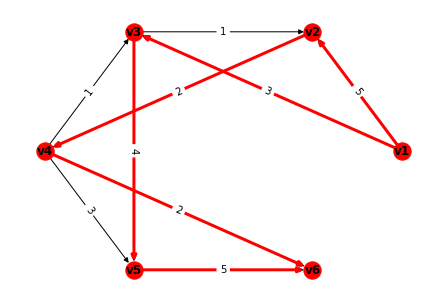

In [22]:
import numpy as np
import networkx as nx
import pylab as plt

L = [(1, 2, 5), (1, 3, 3), (2, 4, 2), (3, 2, 1), (3, 5, 4), (4, 3, 1),
     (4, 5, 3), (4, 6, 2), (5, 6, 5)]

G = nx.DiGraph()
for k in range(len(L)):
    G.add_edge(L[k][0] - 1, L[k][1] - 1, capacity=L[k][2])
value, flow_dict = nx.maximum_flow(G, 0, 5)
print("最大流的流量为：", value)
print("最大流为：", flow_dict)

n = len(flow_dict)
adj_mat = np.zeros((n, n), dtype=int)
for i, adj in flow_dict.items():
    for j, weight in adj.items():
        adj_mat[i, j] = weight
print("最大流的邻接矩阵为：\n", adj_mat)
ni, nj = np.nonzero(adj_mat)  # 非零弧的两端点编号
key = range(n)
s = ['v' + str(i + 1) for i in range(n)]
s = dict(zip(key, s))  # 构造用于顶点标注的字符字典
plt.rc('font', size=16)
pos = nx.shell_layout(G)  # 设置布局
w = nx.get_edge_attributes(G, 'capacity')
nx.draw(G, pos, font_weight='bold', labels=s, node_color='r')
nx.draw_networkx_edge_labels(G, pos, edge_labels=w)
path_edges = list(zip(ni, nj))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=3)
plt.show()